# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

# some nicer colors from http://colorbrewer2.org/
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'

df = pd.read_csv('data/human_body_temperature.csv')

In [6]:
# Your work here.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [7]:
df.shape

(130, 3)

In [21]:
body_temp = df.temperature
pop_mean = body_temp.mean()
print(pop_mean)
print(np.mean(body_temp))

98.24923076923078
98.24923076923078


As the p-value is 0.26 we can not reject the null hypothesis (the distribution is normal). Thus, we conclude that the body temperature is normally distributed.


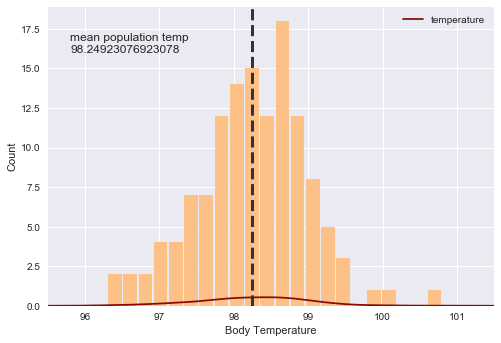

In [79]:
#Is the distribution of body temperatures normal? 
sns.set(color_codes=True, palette = 'dark')

plt.hist(body_temp, bins = 22, color = COLOR3, rwidth = 0.9)
sns.kdeplot(body_temp, color = 'r')
plt.axvline(pop_mean, linewidth = 3, color = '0.2', linestyle = 'dashed')
plt.xlim(95.5,101.5)
plt.xlabel('Body Temperature')
plt.ylabel('Count')
plt.text(95.8, 16, 'mean population temp \n' + str(pop_mean))

norm_test = stats.normaltest(body_temp)
if norm_test[1] > 0.05:
    print('As the p-value is {0:2.2f} we can not reject the null hypothesis (the distribution is normal). Thus, we conclude that the body temperature is normally distributed.'.format(norm_test[1]))
else:
    print('body_temp is not normally distributed')

In [40]:
stats.ttest_1samp(body_temp, pop_mean, 0)

Ttest_1sampResult(statistic=-4.419868934050681e-13, pvalue=0.99999999999964806)

In [45]:
type(df.shape)

tuple

In [46]:
df.shape[0]

130

In [47]:
if df.shape[0] >= 30:
    print('sample size is large enough and Z statistcs should be calculated')
else:
    print('sample size is NOT large enough and t statistcs should be calculated')

sample size is large enough and Z statistcs should be calculated


### Are the observations independent? 

This tests whether 2 samples are drawn from the same distribution. Note that, like in the case of the one-sample K-S test, the distribution is assumed to be continuous.

This is the two-sided test, one-sided tests are not implemented. The test uses the two-sided asymptotic Kolmogorov-Smirnov distribution.

If the K-S statistic is small or the p-value is high, then we cannot reject the hypothesis that the distributions of the two samples are the same.

In [78]:
np.random.seed(12345678)  #fix random seed to get the same result

n1 = body_temp[:36]  # first sample
n2 = body_temp[69:109] # second sample

type(n1)
len(n1)

indep_test = stats.ks_2samp(n1, n2)

if indep_test[1] > 0.05:
    print('The K-S statistic is small or the p-value is high p: {0:2.2f}.\n' 'So, we cannot reject the hypothesis that the distributions of the two samples are the same.'. format(indep_test[1]))
else:
    print('since p-value: {0:2.2f} is less than 5%/n' 'The observations are not independent'.format(indep_test[1]))

The K-S statistic is small or the p-value is high p: 0.43.
So, we cannot reject the hypothesis that the distributions of the two samples are the same.


In [80]:
body_temp.std()

0.7331831580389454

## Is the true population mean really 98.6 degrees F?

### H0 = 98.6 deg. F

In [123]:
print('mean of df.temperature is {0:2.2f}'.format(np.mean(df.temperature)))
print('standard deviate of df.temperature is {0:2.2f}'.format(np.std(df.temperature)))
n3=body_temp[13:67]
mu = 98.6
result = stats.ttest_1samp(df.temperature, mu)
result[1]

if result[1] > 0.05:
    print('Since p-value: {0:2.2f} is large, can\'t reject the null hypothesis. True mean is: {1:2.2f}'.format(result[1], mu))
else:
    print('The population mean for temperature is not {0:2.2f}.'.format(mu))

mean of df.temperature is 98.25
standard deviate of df.temperature is 0.73
The population mean for temperature is not 98.60.


In [121]:
zskor = stats.zscore(df.temperature, ddof=1)
print(zskor.max())
print(zskor.min())

3.47903413056
-2.65858639531


In [124]:
result[0]

-5.4548232923645195

In [132]:
se=np.std(df.temperature/np.sqrt(130))
se

0.06405661469519347

In [138]:
mu= 98.6
x=98.249231
Z=round(float((x-mu)/se))
Z

-5

In [140]:
max_CI=mu-(Z*se)
min_CI=mu+(Z*se)
print (min_CI,max_CI)

98.27971692652403 98.92028307347596


In [141]:
samp10 = df.temperature[:11]

In [142]:
ttest_samp10 = stats.ttest_1samp(samp10, mu)

In [143]:
Znew=round(float((samp10.mean()-mu)/se))

In [145]:
print(ttest_samp10)
print(Znew)

Ttest_1sampResult(statistic=-0.05771579152709886, pvalue=0.95511201546343827)
0


### t-test is better

## At what temperature should we consider someone's temperature to be "abnormal"?

At temperatures beyond CI calculated above


## Is there a significant difference between males and females in normal temperature? 

In [147]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [148]:
df.gender.value_counts()

M    65
F    65
Name: gender, dtype: int64

In [160]:
male = df[df['gender']=='M']
female = df[df['gender']=='F']

In [161]:
male.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.104615,73.369231
std,0.698756,5.875184
min,96.300000,58.000000
25%,97.600000,70.000000
50%,98.100000,73.000000
75%,98.600000,78.000000
max,99.500000,86.000000


In [162]:
female.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.393846,74.153846
std,0.743488,8.105227
min,96.400000,57.000000
25%,98.000000,68.000000
50%,98.400000,76.000000
75%,98.800000,80.000000
max,100.800000,89.000000


In [165]:
# 2 samp t-test:
stats.ttest_ind(male.temperature, female.temperature)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

## So we can reject the Ho. Thus, there is a significant difference between males and females in normal temperature.

In [166]:
male.temperature.mean()

98.1046153846154

In [167]:
female.temperature.mean()

98.39384615384613

In [169]:
# 2 samp t-test:
stats.ttest_1samp((male.temperature - female.temperature), 0)

Ttest_1sampResult(statistic=nan, pvalue=nan)